Import required libraries

In [1]:
import pandas as pd
import seaborn as sns


Bring in the data

In [2]:
data = pd.read_csv('./../data/cumulative_koi_data.csv', skiprows=53)
data.head(n=100)


,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3734868,K00805.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.053,0,1,0,0,...,-169.0,4.359,0.180,-0.180,1.024,0.280,-0.186,287.69675,38.886452,15.646
96,3832474,K00806.01,Kepler-30 d,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-120.0,4.556,0.014,-0.081,0.867,0.079,-0.037,285.28363,38.947281,15.403
97,8395660,K00116.03,Kepler-106 b,CONFIRMED,CANDIDATE,0.950,0,0,0,0,...,-117.0,4.406,0.090,-0.110,1.012,0.154,-0.103,300.86398,44.337551,12.882
98,3832474,K00806.02,Kepler-30 c,CONFIRMED,CANDIDATE,0.745,0,0,0,0,...,-120.0,4.556,0.014,-0.081,0.867,0.079,-0.037,285.28363,38.947281,15.403


In [3]:
data['koi_disposition'].value_counts()

FALSE POSITIVE    4839
CONFIRMED         2671
CANDIDATE         2054
Name: koi_disposition, dtype: int64

In [4]:
data = data.rename(columns={

'kepid': 'kepid',
'kepoi_name': 'koi_name',
'kepler_name': 'kepler_name',
'koi_disposition': 'exoplanet_archive_disposition',
'koi_pdisposition': 'disposition_using_kepler_data',
'koi_score': 'disposition_score',
'koi_fpflag_nt': 'not_transit_like_false_positive_flag',
'koi_fpflag_ss': 'stellar_eclipse_false_positive_flag',
'koi_fpflag_co': 'centroid_offset_false_positive_flag',
'koi_fpflag_ec': 'ephemeris_match_indicates_contamination_false_positive_flag',
'koi_period': 'orbital_period_days',
'koi_period_err1': 'orbital_period_upper_unc_days',
'koi_period_err2': 'orbital_period_lower_unc_days',
'koi_time0bk': 'transit_epoch_bkjd',
'koi_time0bk_err1': 'transit_epoch_upper_unc_bkjd',
'koi_time0bk_err2': 'transit_epoch_lower_unc_bkjd',
'koi_impact': 'impact_parameter',
'koi_impact_err1': 'impact_parameter_upper_unc',
'koi_impact_err2': 'impact_parameter_lower_unc',
'koi_duration': 'transit_duration_hrs',
'koi_duration_err1': 'transit_duration_upper_unc_hrs',
'koi_duration_err2': 'transit_duration_lower_unc_hrs',
'koi_depth': 'transit_depth_ppm',
'koi_depth_err1': 'transit_depth_upper_unc_ppm',
'koi_depth_err2': 'transit_depth_lower_unc_ppm',
'koi_prad': 'planetary_radius_earth_radii',
'koi_prad_err1': 'planetary_radius_upper_unc_earth_radii',
'koi_prad_err2': 'planetary_radius_lower_unc_earth_radii',
'koi_teq': 'equilibrium_temperature_k',
'koi_teq_err1': 'equilibrium_temperature_upper_unc_k',
'koi_teq_err2': 'equilibrium_temperature_lower_unc_k',
'koi_insol': 'insolation_flux_earth_flux',
'koi_insol_err1': 'insolation_flux_upper_unc_earth_flux',
'koi_insol_err2': 'insolation_flux_lower_unc_earth_flux',
'koi_model_snr': 'transit_signal_to_noise',
'koi_tce_plnt_num': 'tce_planet_number',
'koi_tce_delivname': 'tce_delivery',
'koi_steff': 'stellar_effective_temperature_k',
'koi_steff_err1': 'stellar_effective_temperature_upper_unc_k',
'koi_steff_err2': 'stellar_effective_temperature_lower_unc_k',
'koi_slogg': 'stellar_surface_gravity',
'koi_slogg_err1': 'stellar_surface_gravity_upper_unc',
'koi_slogg_err2': 'stellar_surface_gravity_lower_unc',
'koi_srad': 'stellar_radius_solar_radii',
'koi_srad_err1': 'stellar_radius_upper_unc_solar_radii',
'koi_srad_err2': 'stellar_radius_lower_unc_solar_radii',
'ra': 'ra_decimal_degrees',
'dec': 'dec_decimal_degrees',
'koi_kepmag': 'kepler_band_mag'

})

data.head()



,kepid,koi_name,kepler_name,exoplanet_archive_disposition,disposition_using_kepler_data,disposition_score,not_transit_like_false_positive_flag,stellar_eclipse_false_positive_flag,centroid_offset_false_positive_flag,ephemeris_match_indicates_contamination_false_positive_flag,...,stellar_effective_temperature_lower_unc_k,stellar_surface_gravity,stellar_surface_gravity_upper_unc,stellar_surface_gravity_lower_unc,stellar_radius_solar_radii,stellar_radius_upper_unc_solar_radii,stellar_radius_lower_unc_solar_radii,ra_decimal_degrees,dec_decimal_degrees,kepler_band_mag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


## EDA

In [5]:
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 49 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   kepid                                                        9564 non-null   int64  
 1   koi_name                                                     9564 non-null   object 
 2   kepler_name                                                  2673 non-null   object 
 3   exoplanet_archive_disposition                                9564 non-null   object 
 4   disposition_using_kepler_data                                9564 non-null   object 
 5   disposition_score                                            8054 non-null   float64
 6   not_transit_like_false_positive_flag                         9564 non-null   int64  
 7   stellar_eclipse_false_positive_flag                          9564 non-null   i

How many nulls?

In [6]:
data.dropna(how='all', axis=1, inplace=True)

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 47 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   kepid                                                        9564 non-null   int64  
 1   koi_name                                                     9564 non-null   object 
 2   kepler_name                                                  2673 non-null   object 
 3   exoplanet_archive_disposition                                9564 non-null   object 
 4   disposition_using_kepler_data                                9564 non-null   object 
 5   disposition_score                                            8054 non-null   float64
 6   not_transit_like_false_positive_flag                         9564 non-null   int64  
 7   stellar_eclipse_false_positive_flag                          9564 non-null   i

Now 47 columns left.

Drop categorical variables

In [7]:
data.drop(columns=['kepid', 'koi_name', 'kepler_name', 'exoplanet_archive_disposition', 'tce_delivery', 'not_transit_like_false_positive_flag', 'stellar_eclipse_false_positive_flag', 'centroid_offset_false_positive_flag', 'ephemeris_match_indicates_contamination_false_positive_flag'], inplace=True)
data.head()



,disposition_using_kepler_data,disposition_score,orbital_period_days,orbital_period_upper_unc_days,orbital_period_lower_unc_days,transit_epoch_bkjd,transit_epoch_upper_unc_bkjd,transit_epoch_lower_unc_bkjd,impact_parameter,impact_parameter_upper_unc,...,stellar_effective_temperature_lower_unc_k,stellar_surface_gravity,stellar_surface_gravity_upper_unc,stellar_surface_gravity_lower_unc,stellar_radius_solar_radii,stellar_radius_upper_unc_solar_radii,stellar_radius_lower_unc_solar_radii,ra_decimal_degrees,dec_decimal_degrees,kepler_band_mag
0,CANDIDATE,1.000,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,CANDIDATE,0.969,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,CANDIDATE,0.000,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,FALSE POSITIVE,0.000,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,CANDIDATE,1.000,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


Drop empty rows

In [8]:
data.dropna(inplace=True)

data.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 7803 entries, 0 to 9563
Data columns (total 38 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   disposition_using_kepler_data              7803 non-null   object 
 1   disposition_score                          7803 non-null   float64
 2   orbital_period_days                        7803 non-null   float64
 3   orbital_period_upper_unc_days              7803 non-null   float64
 4   orbital_period_lower_unc_days              7803 non-null   float64
 5   transit_epoch_bkjd                         7803 non-null   float64
 6   transit_epoch_upper_unc_bkjd               7803 non-null   float64
 7   transit_epoch_lower_unc_bkjd               7803 non-null   float64
 8   impact_parameter                           7803 non-null   float64
 9   impact_parameter_upper_unc                 7803 non-null   float64
 10  impact_parameter_lower_u

Ys to categorical. "Candidate" becomes "0" and "False positive" becomes "1".

In [9]:
data['disposition_using_kepler_data'] = data['disposition_using_kepler_data'].astype('category').cat.codes
data.head()



,disposition_using_kepler_data,disposition_score,orbital_period_days,orbital_period_upper_unc_days,orbital_period_lower_unc_days,transit_epoch_bkjd,transit_epoch_upper_unc_bkjd,transit_epoch_lower_unc_bkjd,impact_parameter,impact_parameter_upper_unc,...,stellar_effective_temperature_lower_unc_k,stellar_surface_gravity,stellar_surface_gravity_upper_unc,stellar_surface_gravity_lower_unc,stellar_radius_solar_radii,stellar_radius_upper_unc_solar_radii,stellar_radius_lower_unc_solar_radii,ra_decimal_degrees,dec_decimal_degrees,kepler_band_mag
0,0,1.000,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,0.969,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,0,0.000,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,1,0.000,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,0,1.000,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


Creating the $X$' and $y$.

In [10]:
y = data['disposition_using_kepler_data']
X = data[data.columns.drop('disposition_using_kepler_data')]


See label frequency

In [11]:
y.value_counts()


0    4062
1    3741
Name: disposition_using_kepler_data, dtype: int64

Normalize

In [12]:
from sklearn.preprocessing import StandardScaler

# Normalize
X_cols = X.columns
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

pd.DataFrame(X, columns=X_cols)


,disposition_score,orbital_period_days,orbital_period_upper_unc_days,orbital_period_lower_unc_days,transit_epoch_bkjd,transit_epoch_upper_unc_bkjd,transit_epoch_lower_unc_bkjd,impact_parameter,impact_parameter_upper_unc,impact_parameter_lower_unc,...,stellar_effective_temperature_lower_unc_k,stellar_surface_gravity,stellar_surface_gravity_upper_unc,stellar_surface_gravity_lower_unc,stellar_radius_solar_radii,stellar_radius_upper_unc_solar_radii,stellar_radius_lower_unc_solar_radii,ra_decimal_degrees,dec_decimal_degrees,kepler_band_mag
0,1.065683,-0.320503,-0.183453,0.183453,0.218721,-0.264257,0.264257,-0.655635,-0.182028,0.295435,...,1.049663,0.348736,-0.424711,0.526629,-0.127996,-0.249311,0.164990,-0.029139,1.196093,0.776930
1,1.000701,0.197005,-0.139571,0.139571,0.080093,-0.197742,0.197742,-0.033490,-0.208156,-0.330073,...,1.049663,0.348736,-0.424711,0.526629,-0.127996,-0.249311,0.164990,-0.029139,1.196093,0.776930
2,-1.030526,-0.200588,-0.186006,0.186006,0.310475,-0.341483,0.341483,0.508060,0.303001,0.440755,...,-0.227969,0.531679,-0.575340,-0.662090,-0.138045,-0.098945,0.155952,1.030117,1.194003,0.843600
3,-1.030526,-0.409780,-0.188931,0.188931,0.214727,-0.364274,0.364274,0.942147,-0.202506,0.409164,...,-0.201071,0.579196,-0.507557,-0.543218,-0.151159,-0.136537,0.161800,-1.366031,1.235974,0.964206
4,1.065683,-0.400697,-0.188234,0.188234,0.236977,-0.314633,0.314633,0.129117,-0.190401,-0.403786,...,-0.698675,0.279835,-0.379522,-1.167296,-0.107727,0.019703,0.126710,-0.693310,1.219581,0.898285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7798,-1.030526,-0.423708,-0.188961,0.188961,-0.452116,-0.361584,0.361584,0.908212,-0.208963,0.499726,...,-0.093481,0.496040,-0.643123,-0.959270,-0.132083,-0.094246,0.155420,1.068540,0.905001,-0.170684
7799,0.011290,-0.409747,-0.185436,0.185436,-0.429725,0.006204,-0.006204,-0.801274,-0.171436,0.512362,...,-0.819714,0.294090,-0.484962,-1.375322,-0.110282,0.027926,0.136812,-1.162401,0.924281,0.334960
7800,-0.986506,-0.421938,-0.188499,0.188499,-0.443882,-0.230511,0.230511,-0.654221,-0.182936,0.293329,...,-1.034894,0.301218,-0.484962,-1.375322,-0.108579,0.027926,0.136812,0.436850,0.927909,0.805396
7801,-0.837675,3.411313,0.655157,-0.655157,-0.073631,-0.121935,0.121935,-0.559485,-0.188383,0.152221,...,0.417571,-3.155693,-0.680780,1.551899,1.046716,-0.110693,-0.810611,0.979575,0.919259,-2.480916


In [78]:
from sklearn.model_selection import train_test_split

# Split X and y into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


## Support Vector Machines

In [79]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

np.random.seed(123)



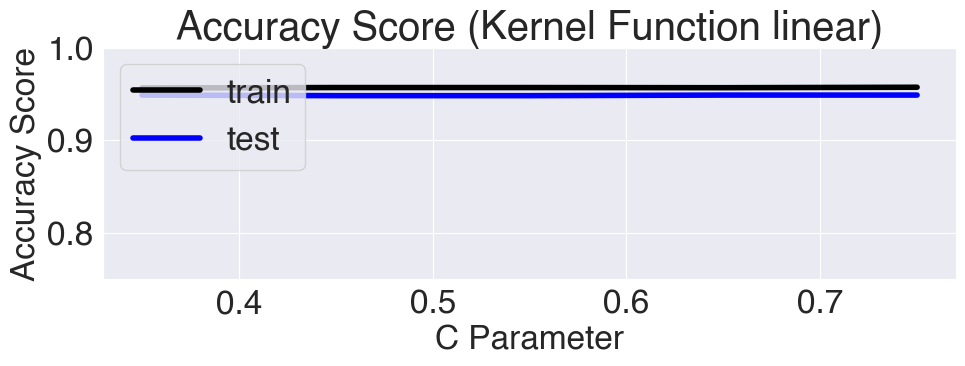

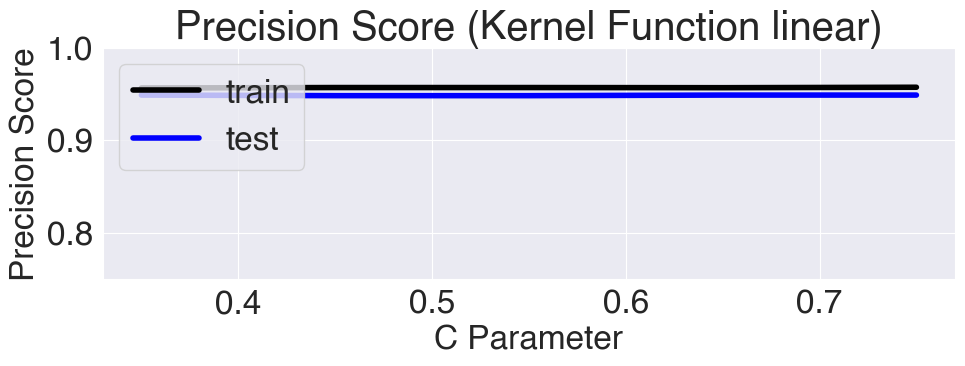

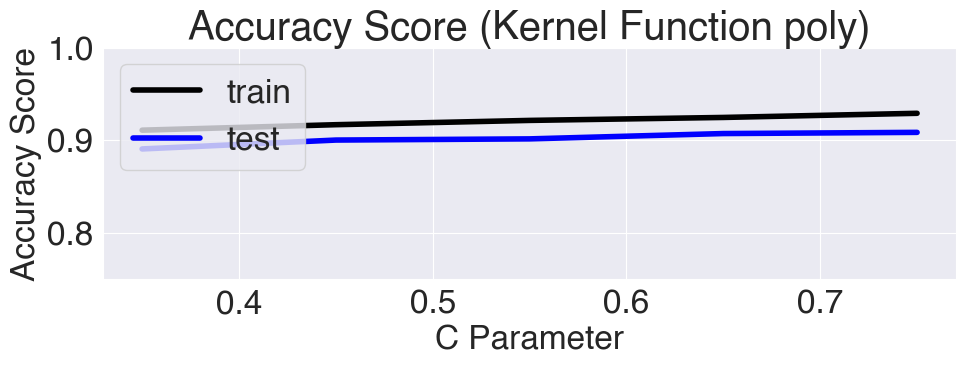

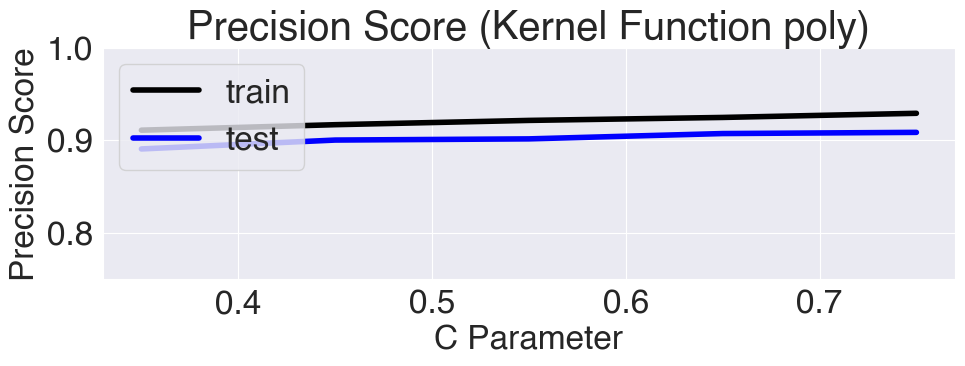

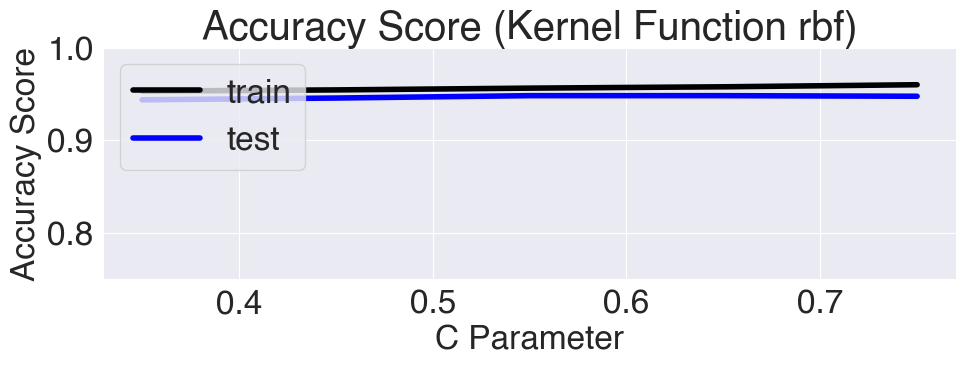

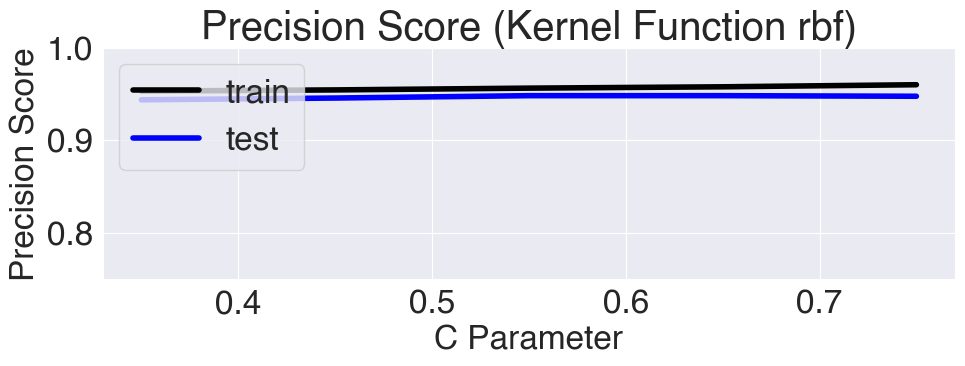

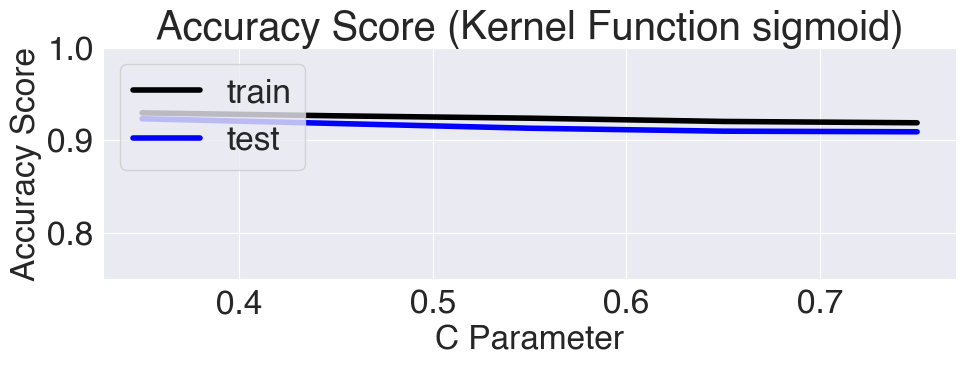

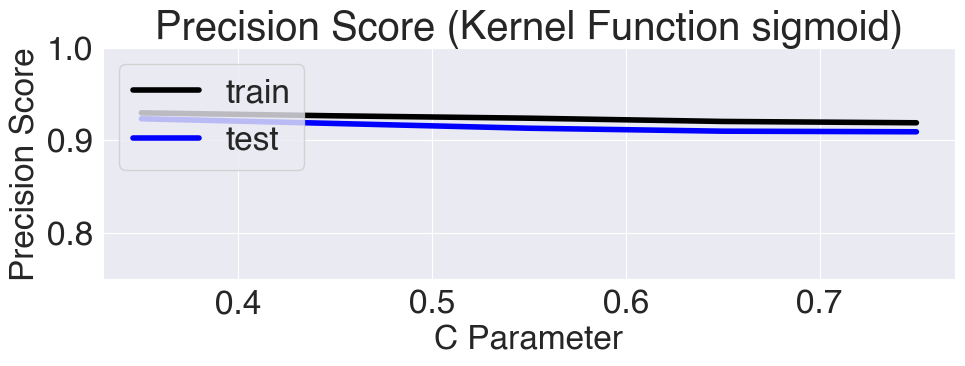

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as  pd
import random
from collections import Counter
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, precision_score, accuracy_score, mean_absolute_error, precision_recall_fscore_support
from sklearn.svm import SVC
from matplotlib.pyplot import *

rcParams["font.family"] = "Helvetica"

np.random.seed(123)

def make_svm(kernel_function):

    # Initialize lists to store output
    hyper_param = []
    train_accuracy = []
    test_accuracy = []
    train_precision = []
    test_precision = []

    # Define C's to use
    C_parameters = [0.35, 0.45, 0.55, 0.65, 0.75]

    # Fit the models in a loop with different C's
    for C_regularization in C_parameters:
        if kernel_function == 'poly':
            model = SVC(kernel=kernel_function, C = C_regularization, degree=2)
        else:
            model = SVC(kernel=kernel_function, C=C_regularization)

        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        # Store output
        hyper_param.append(C_regularization)

        train_accuracy.append(accuracy_score(y_train, y_pred_train))
        train_precision.append(precision_score(y_train, y_pred_train, average='micro'))

        test_accuracy.append(accuracy_score(y_test, y_pred_test))
        test_precision.append(precision_score(y_test, y_pred_test, average='micro'))

    # Plots
    title = "Accuracy Score (Kernel Function {0})".format(kernel_function)
    plt.figure(figsize=(11,3))
    plt.plot(hyper_param, train_accuracy, linewidth=4, color='k', label='train')
    plt.plot(hyper_param, test_accuracy, linewidth=4, color='b', label='test')
    plt.legend(loc="upper left")
    plt.xlabel("C Parameter")
    plt.ylabel("Accuracy Score")
    plt.title(title)
    plt.ylim([0.75, 1])
    plt.rcParams.update({'font.size': 24})
    plt.savefig('./../img/{0}.png'.format(title))
    plt.show()

    title = "Precision Score (Kernel Function {0})".format(kernel_function)
    plt.figure(figsize=(11,3))
    plt.plot(hyper_param, train_precision, linewidth=4, color='k', label='train')
    plt.plot(hyper_param, test_precision, linewidth=4, color='b', label='test')
    plt.legend(loc="upper left")
    plt.xlabel("C Parameter")
    plt.ylabel("Precision Score")
    plt.title(title)
    plt.ylim([0.75, 1])
    plt.rcParams.update({'font.size': 24})
    plt.savefig('./../img/{0}.png'.format(title))
    plt.show()

make_svm('linear')
make_svm('poly')
make_svm('rbf')
make_svm('sigmoid')

In [106]:

model_svm = SVC(kernel='linear', C=0.5)
model_svm.fit(X_train, y_train)

y_pred_train = model_svm.predict(X_train)
y_pred_test = model_svm.predict(X_test)

print('Train Classification Report')
print('-------------------------')
train_classification_report = classification_report(y_train, y_pred_train, output_dict = True)
train_classification_report = pd.DataFrame.from_dict(train_classification_report).transpose()

print(train_classification_report)


print('Test Classification Report')
print('-------------------------')

test_classification_report = classification_report(y_test, y_pred_test, output_dict = True)
test_classification_report = pd.DataFrame.from_dict(test_classification_report).transpose()

print(test_classification_report)


Train Classification Report
-------------------------
              precision    recall  f1-score      support
0              0.972629  0.943501  0.957844  3239.000000
1              0.940968  0.971362  0.955923  3003.000000
accuracy       0.956905  0.956905  0.956905     0.956905
macro avg      0.956798  0.957432  0.956883  6242.000000
weighted avg   0.957397  0.956905  0.956920  6242.000000
Test Classification Report
-------------------------
              precision    recall  f1-score     support
0              0.964912  0.935601  0.950031   823.00000
1              0.930537  0.962060  0.946036   738.00000
accuracy       0.948110  0.948110  0.948110     0.94811
macro avg      0.947725  0.948831  0.948033  1561.00000
weighted avg   0.948661  0.948110  0.948142  1561.00000


Cross validation

In [18]:
#### Source: https://scikit-learn.org/stable/modules/cross_validation.html
from sklearn.model_selection import cross_val_score
from sklearn import svm

clf = svm.SVC(kernel='linear', C=0.5, random_state=0)
scores = cross_val_score(clf, X, y, cv=10)
scores
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))